# Pre-Lab 8

## Section 6.3.4: Binary Search

* **Binary search** or the **bisection method** is a way to find multiple solutions to nonlinear equations. This method only searches within a spcified range, and if there is a solution in this range, it is always found.
* Binary search works by rearranging the equation so that f(x) = 0, and finding the roots. 
* If there is a single root between points x1 and x2, then f(x1) and f(x2) must have opposite signs.
* Let x' be the point half way in between x1 and x2. If f(x') = 0, this is the solution, and if f(x') has an opposite sign as f(x1) then x1 and x' bracket the solution.
* Repeat this process of finding the point halfway in between the previous bracket points, and narrowing the range to the desired accuracy.
* The error decreses exponentially with each step. $N = log_2\frac{\delta}{\epsilon}$ where n is the number of steps and $\delta$ is the distance between x1 and x2.
    * N will be relatively sall even if $delta$ is very large.
* This method will not work if there are an even number of roots in the interval, which would cause x1 and x2 to have the same sign.
* Most of the time, it is sufficient to find any pair of x values that have a different sign, but there is no universal way to do this. 
     * Use facts you know about the equation to estimate which vaules must be positive and which must be negative.
     * If you are looking for a root near a specific x, choose x1 and x2 to be closely spaced around that x.
* Another time this method can fail is when the function only touches the x axis, but does not cross it. 
* Another drawback is that this method only works for one equation and one solution at a time. 

## Section 6.3.5: Newton's Method

* Newton's method is similat to the binary search method in that we are looking for a root. First choose a single value of x to start with, and then use the slope at f(x) to calucate a new x'. Normally x' will be closer to the root. 
* Use formulas $f'(x) = \frac{f(x)}{\delta x}$ and $x' = x - \delta x$ to calculate $\delta x$.
    * All we need here is the derivative at f(x) and an initial guess of x.
* It is often adequite to run the algorithm until the value stops changing within a spcified number of decimal places. 
* If $x*$ is equal to the root, then the error can be calcuated by rearranging the taylor series and using the fact that $f(x*) = 0$, $x* = x' - 1/2(x* - x)^2\frac{f''(x)}{f'(x)} +...$
* The error, $\epsilon ' = \frac{-f''(x)}{2f'(x)}\epsilon^2$, so that $x* = x' + \epsilon '$. This means Newton's method has quadratic convergence, so it converges must faster than the other methods. 
* The error can be approximated $\epsilon = x' - x$ if $\epsilon$ is small.
* One problem is that this method does not always converge. Sometimes epsolon will get larger. 

## Example 6.3: Ferromagnetism

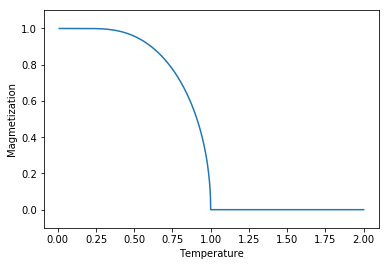

In [1]:
# This code uses the relaxation method to plot the magnetization of a farromagmetic material vs temperature 

from math import tanh, cosh
from numpy import linspace 
from pylab import plot, show, ylim, xlabel, ylabel

# Constants
Tmax = 2.0
points = 1000
accuracy = 1e-6

# Set up lists for plotting
y = []
temp = linspace (0.01, Tmax, points)

# Temperature loop
for T in temp:
    m1 = 1.0
    error = 1.0
    
    # Relaxation method: loop until error is small enough
    while error > accuracy:
        m1, m2 = tanh(m1/T), m1
        error = abs((m1-m2)/(1 - T * cosh(m1/T)**2))
    y.append(m1)
    
# Make the graph
plot (temp, y)
ylim (-0.1, 1.1)
xlabel ("Temperature")
ylabel ("Magmetization")
show ()